<div style="text-align: left"><span style="font-family:Times New Roman; font-size:2.2em;"><font color="#E94F64">Kaggle Dataset: Iris Classification</font></div>

<a id="10"></a> <br>

<div style="text-align: left"><span style="font-family:Times New Roman; font-size:2em;"><font color="#E94F64">Overview</font></div>

1. Problem Definition
    1. Aim
    2. Feature Values (independent variables)
    3. Target Values (dependent variables)
    4. Inputs (the entire data set or a subset of it)
    5. Outputs (prediciton, classification)
2. Exploratory Data Analysis
    1. Data Overview
    2. Visualization
    3. Data Preprocessing
    4. Data Cleaning
3. Model Deployment
    1. Training the model(s)

<a id="10"></a> <br>

<div style="text-align: left"><span style="font-family:Times New Roman; font-size:2em;"><font color="#E94F64">1. Problem Definition</font></div>


<div style="text-align: left"><span style="font-family:Times New Roman; font-size:1.5em;"><font color="#E94F64">1.1 Aim</font></div>

Classify iris flowers as one of three species by using measurements of sepal length/width and petal length/width.

<div style="text-align: left"><span style="font-family:Times New Roman; font-size:1.5em;"><font color="#E94F64">1.2 Feature Values</font></div>

- sepal_length [cm]
- sepal_width [cm]
- petal_length [cm]
- petal_width [cm]

<div style="text-align: left"><span style="font-family:Times New Roman; font-size:1.6em;"><font color="#E94F64">1.3 Target Values</font></div>

- iris setosa [T/F]
- iris versicolour [T/F]
- iris virginica [T/F]

<div style="text-align: left"><span style="font-family:Times New Roman; font-size:1.6em;"><font color="#E94F64">1.4 Inputs</font></div>

The iris data set (https://www.kaggle.com/uciml/iris) retrieved from kaggle.

<div style="text-align: left"><span style="font-family:Times New Roman; font-size:1.6em;"><font color="#E94F64">1.5 Outputs</font></div>

We'll be running several different models, so there will be different types of outputs (e.g. ........

<a id="10"></a> <br>

<div style="text-align: left"><span style="font-family:Times New Roman; font-size:2em;"><font color="#E94F64">2. Exploratory Data Analysis</font></div>

In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
#import warnings
#warnings.filterwarnings('ignore')

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
import matplotlib.ticker as ticker
import matplotlib.pylab as pylab
import matplotlib.pyplot as plt
from pandas import get_dummies
import matplotlib as mpl
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib
import warnings
import sklearn
import scipy
import numpy
import json
import sys
import csv
import os

from fastai.imports import *
from fastai.structured import *

/anaconda2/envs/myFastAI/lib/python3.6/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [4]:
def set_plot_sizes(sml, med, big):
    plt.rc('font', size=sml)          # controls default text sizes
    plt.rc('axes', titlesize=sml)     # fontsize of the axes title
    plt.rc('axes', labelsize=med)     # fontsize of the x and y labels
    plt.rc('xtick', labelsize=sml)    # fontsize of the tick labels
    plt.rc('ytick', labelsize=sml)    # fontsize of the tick labels
    plt.rc('legend', fontsize=sml)    # legend fontsize
    plt.rc('figure', titlesize=big)   # fontsize of the figure title

plt.style.use('ggplot')
set_plot_sizes(12,14,16)
pylab.rcParams['figure.figsize'] = 12,8

In [5]:
df = pd.read_csv('data/IRIS.csv')

<div style="text-align: left"><span style="font-family:Times New Roman; font-size:1.6em;"><font color="#E94F64">2.1 Data Overview</font></div>

Let's get a general idea of what our data looks like and contains.

In [6]:
df.head()

,Id,sepal_length,sepal_width,petal_length,petal_width,species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [7]:
df.describe()

,Id,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [8]:
df.index

RangeIndex(start=0, stop=150, step=1)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
Id              150 non-null int64
sepal_length    150 non-null float64
sepal_width     150 non-null float64
petal_length    150 non-null float64
petal_width     150 non-null float64
species         150 non-null object
dtypes: float64(4), int64(1), object(1)
memory usage: 7.1+ KB


In [10]:
df.isnull().sum()

Id              0
sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [11]:
# Convert categories to number IDs.
t = train_cats(df)

# To look at the category labels
# df.species.cat.categories

# To look at the numerical codes for the category labels
# df.species.cat.codes

If a category gets a particular number in the train data, it should have the same value in the test data. For instance, if the train data has 3 for high and test data has 2, then it will have two different meanings. We can use `apply_cats` for validation and test sets to make sure that the mappings are the same throughout the different sets

Normally, pandas will continue displaying the text categories, while treating them as numerical data internally. Optionally, we can replace the text categories with numbers, which will make this variable non-categorical, like so:.

In [12]:
#df.species = df.species.cat.codes

<div style="text-align: left"><span style="font-family:Times New Roman; font-size:1.6em;"><font color="#E94F64">2.2 Visualization</font></div>

<div style="text-align: left"><span style="font-family:Times New Roman; font-size:1.4em;"><font color="#E94F64">2.2.1 Scatter Plot</font></div>

If they exist, what are the relationships between two features?

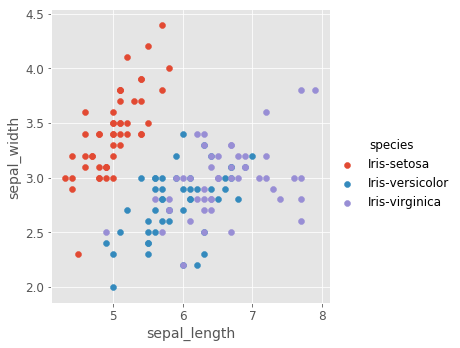

In [13]:
sns.FacetGrid(df, hue="species", height=5) \
   .map(plt.scatter, "sepal_length", "sepal_width") \
   .add_legend()
plt.show()

<div style="text-align: left"><span style="font-family:Times New Roman; font-size:1.4em;"><font color="#E94F64">2.2.2 Histogram</font></div>

Let's get an idea of the distributions of our data.

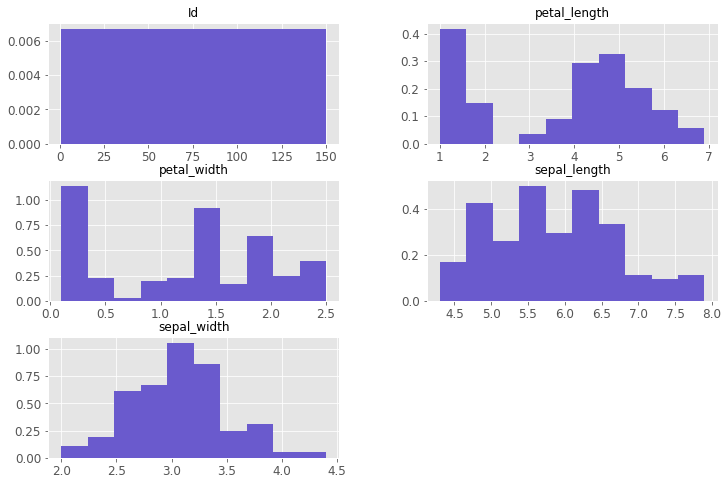

In [14]:
df.hist(color='slateblue', density=True)
plt.show()

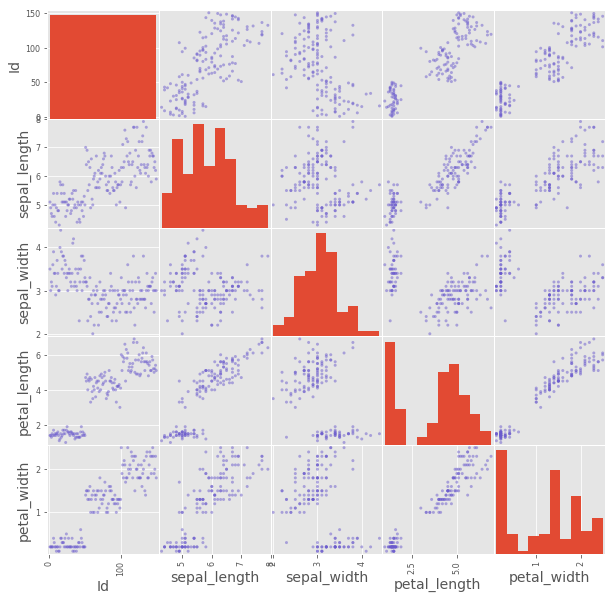

In [15]:
pd.plotting.scatter_matrix(df,figsize=(10,10), color='slateblue')
plt.show()

/anaconda2/envs/myFastAI/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


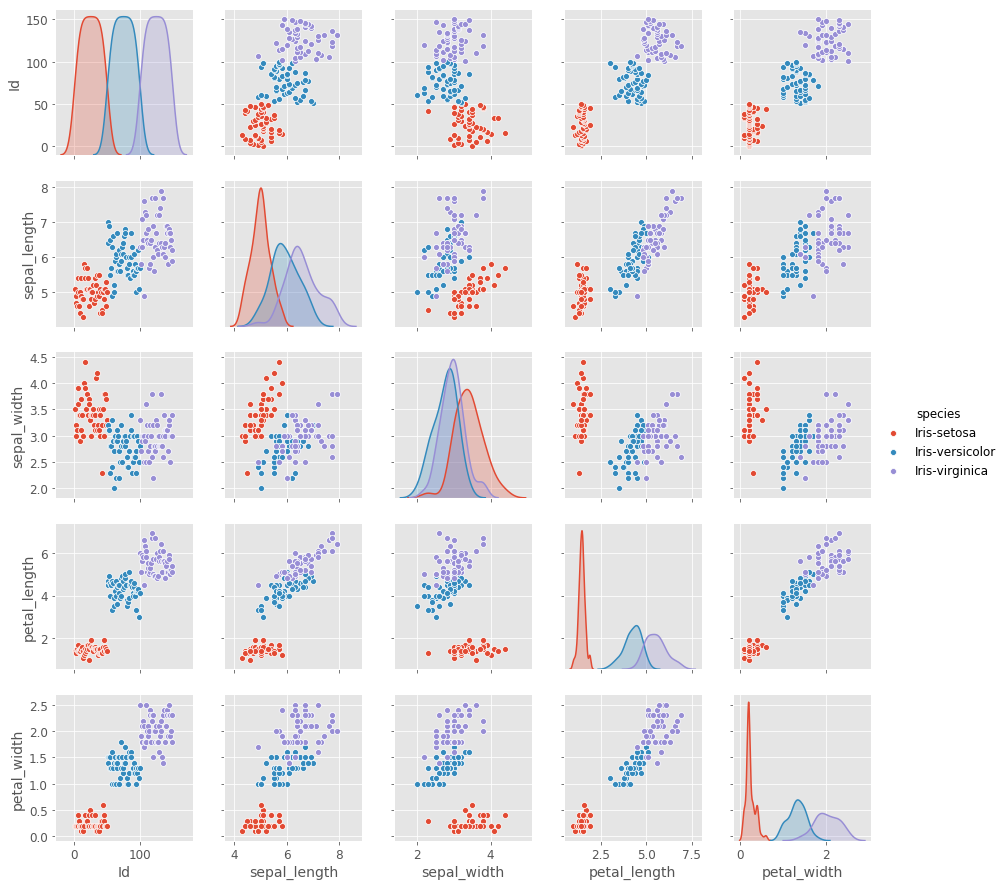

In [16]:
sns.pairplot(df, hue="species",diag_kind="kde")

/anaconda2/envs/myFastAI/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


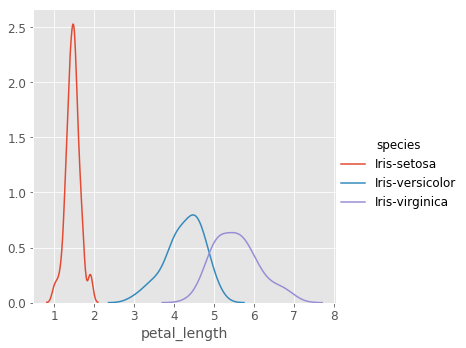

In [17]:
sns.FacetGrid(df, hue="species", height=5).map(sns.kdeplot, "petal_length").add_legend()
plt.show()

/anaconda2/envs/myFastAI/lib/python3.6/site-packages/seaborn/axisgrid.py:2262: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/anaconda2/envs/myFastAI/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


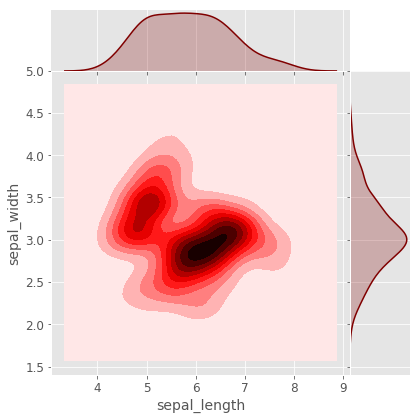

In [18]:
sns.jointplot(x="sepal_length", y="sepal_width", data=df, size=6, kind='kde', color='#800000', space=0)

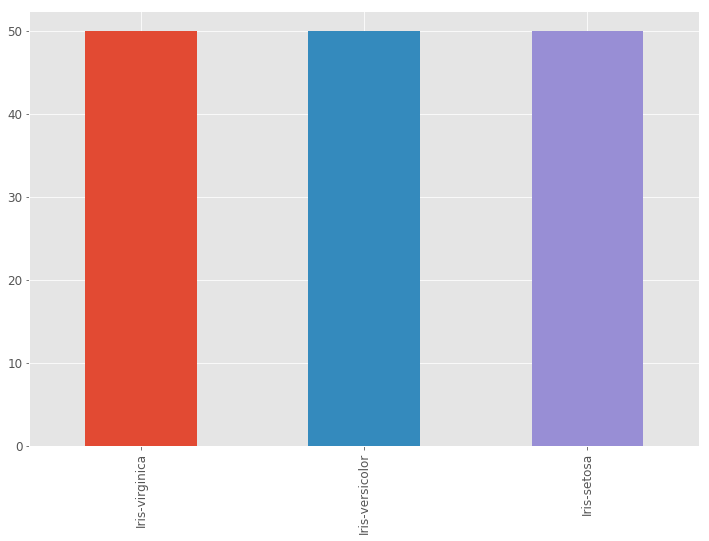

In [19]:
df['species'].value_counts().plot(kind="bar");

<div style="text-align: left"><span style="font-family:Times New Roman; font-size:1.6em;"><font color="#E94F64">2.3 Data Exploration</font></div>

Let's take a closer look at our data.

`unique()` will return the unique values in a series object.

In [20]:
df.species.unique()

[Iris-setosa, Iris-versicolor, Iris-virginica]
Categories (3, object): [Iris-setosa < Iris-versicolor < Iris-virginica]

`value_counts()` returns a series containing the counts of unique values (the object will be in descending order).

In [21]:
df.species.value_counts()

Iris-virginica     50
Iris-versicolor    50
Iris-setosa        50
Name: species, dtype: int64

`sample()` will randomly select a number of rows from a data frame.

In [22]:
df.sample(5)

,Id,sepal_length,sepal_width,petal_length,petal_width,species
71,72,6.1,2.8,4.0,1.3,Iris-versicolor
28,29,5.2,3.4,1.4,0.2,Iris-setosa
104,105,6.5,3.0,5.8,2.2,Iris-virginica
67,68,5.8,2.7,4.1,1.0,Iris-versicolor
128,129,6.4,2.8,5.6,2.1,Iris-virginica


To get a data frame that consists only of entries where a condition is True:

In [23]:
df[df['species'] == 'Iris-setosa'][45:55]#.tail()

,Id,sepal_length,sepal_width,petal_length,petal_width,species
45,46,4.8,3.0,1.4,0.3,Iris-setosa
46,47,5.1,3.8,1.6,0.2,Iris-setosa
47,48,4.6,3.2,1.4,0.2,Iris-setosa
48,49,5.3,3.7,1.5,0.2,Iris-setosa
49,50,5.0,3.3,1.4,0.2,Iris-setosa


<div style="text-align: left"><span style="font-family:Times New Roman; font-size:1.6em;"><font color="#E94F64">2.4 Data Preprocessing and Cleaning</font></div>

Data preprocessing refers to the transformations applied to the data before training a model.
* removing Target column (id)
* Sampling (without replacement)
* Making part of iris unbalanced and balancing (with undersampling and SMOTE)
* Introducing missing values and treating them (replacing by average values)
* Noise filtering
* Data discretization
* Normalization and standardization
* PCA analysis
* Feature selection (filter, embedded, wrapper)

One way to separate data into dependent and indepedent variables is to use integer-location based indexing (`iloc`).
The independent varibles, `X`, for every row will include all columns save the last.
The dependent variables, `y`, will be the last column.
The method `values` will return an array instead of a data frame.

In [24]:
# Get all but the last column of values for the features.
X = df.iloc[:,:-1].values
# Get just the last column of values for the target.
y = df.iloc[:,-1].values

Now that the feature and target values are in arrays, we need the feature and target names.

In [25]:
cols = df.columns
print(cols)

Index(['Id', 'sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')


In [26]:
# Separate the feature column names from the target column name.
features = cols[0:4]
targets = cols[5]

# Check to make sure the feature and target names are correct.
print(features)
print(targets)

Index(['Id', 'sepal_length', 'sepal_width', 'petal_length'], dtype='object')
species


<div style="text-align: left"><span style="font-family:Times New Roman; font-size:1.6em;"><font color="#E94F64">Note: Normalizing or Standardizing Data</font></div>

Machine learning algorithms make assumptions about the dataset you are modeling.

Often, raw data is comprised of attributes with varying scales. For example, one attribute may be in kilograms and another may be a count. Although not required, you can often get a boost in performance by carefully choosing methods to rescale your data.

**Data normalization** is the process of rescaling one or more attributes to the range of 0 to 1. You could also use other scales such as -1 to 1, which is useful when using support vector machines and adaboost. Normalization is useful when your data has varying scales and the algorithm you are using does not make assumptions about the distribution of your data (you might not know what the distribution is), such as k-nearest neighbors and artificial neural networks.

**Data standardization** is the process of rescaling one or more attributes so that they have a mean value of 0 and a standard deviation of 1. Standardization is useful when your data has varying scales and the algorithm you are using does make assumptions about your data having a Gaussian distribution, such as linear regression, logistic regression and linear discriminant analysis.

Here, we'll standardize our data since the KDEs look gaussian.

In [27]:
dfNorm = pd.DataFrame(df)

for feature in features:
    df[feature] = (df[feature] - df[feature].mean()) / df[feature].std()

In [28]:
# Shuffle the data bc it's ordered by species at the moment. When we create a test set
# we want the test set to contain a random assortment of all species.
indices = np.array(dfNorm.index)
np.random.shuffle(indices)
X = dfNorm.reindex(indices)[features]
y = dfNorm.reindex(indices)[targets]

The data needs to be split into a training dataset that can be used to make predictions and a test dataset that we can use to evaluate the accuracy of the model. We need to split the data set randomly. A twiddle good ratio of 70% training and 30% testing.

In [29]:
from sklearn.model_selection import train_test_split

# Generate Training and Validation Sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3)

# Convert to np arrays so that we can use with TensorFlow
X_train = np.array(X_train).astype(np.float32)
X_test  = np.array(X_test).astype(np.float32)

<a id="10"></a> <br>

<div style="text-align: left"><span style="font-family:Times New Roman; font-size:2em;"><font color="#E94F64">3. Model Deployment</font></div>
    
<div style="text-align: left"><span style="font-family:Times New Roman; font-size:1.6em;"><font color="#E94F64">3.1 Evaluating Model Performance</font></div>
* **precision** : 

In pattern recognition, information retrieval and binary classification, precision (also called positive predictive value) is the fraction of relevant instances among the retrieved instances, 
* **recall** : 

recall is the fraction of relevant instances that have been retrieved over the total amount of relevant instances. 
* **F-score** :

the F1 score is a measure of a test's accuracy. It considers both the precision p and the recall r of the test to compute the score: p is the number of correct positive results divided by the number of all positive results returned by the classifier, and r is the number of correct positive results divided by the number of all relevant samples (all samples that should have been identified as positive). The F1 score is the harmonic average of the precision and recall, where an F1 score reaches its best value at 1 (perfect precision and recall) and worst at 0.
**What is the difference between accuracy and precision?
"Accuracy" and "precision" are general terms throughout science. A good way to internalize the difference are the common "bullseye diagrams". In machine learning/statistics as a whole, accuracy vs. precision is analogous to bias vs. variance.

- Look at accuracy</br>
  One way to evaluate a model is to look at its accuracy. E.g., if we are classifying
  movies as Oscars winners or not, then what proportion of movies can we correctly
  identify as Oscar winners?

- Error Rates</br>
  Confusion matrices are great because they allow us to see what types of errors are
  model makes! If our model makes systematic errors, we need to know that! It is
  easiest to think about error rates in the context of a binary confusion matrix. 

<img src="binaryconfusionmatrix.png"
     alt="Example Great Movie"
     style="align: center"/>

- Baseline Classifiers
   - True Positive = You predicted a movie would get an Oscar, and it did! 
   - True Negative = You predicted a movie would *not* get an Oscar, and it did not get one. 
   - False Positive = You predicted a movie would get an Oscar, and it did *not*.
   - False Negative = You predicted a movie would *not* get an Oscar, but it did.

<div style="text-align: left"><span style="font-family:Times New Roman; font-size:1.6em;"><font color="#E94F64">3.2 ML Algorithms</font></div>

There are several categories for machine learning algorithms, below are some of these categories:
* Linear
    * Linear Regression
    * Logistic Regression
    * Support Vector Machines
* Tree-Based
    * Decision Tree
    * Random Forest
    * GBDT
* KNN
* Neural Networks

-----------------------------
And if we  want to categorize ML algorithms with the type of learning, there are below type:
* Classification

    * k-Nearest 	Neighbors
    * LinearRegression
    * SVM
    * DT 
    * NN
    
* clustering

    * K-means
    * HCA
    * Expectation Maximization
    
* Visualization 	and	dimensionality 	reduction:

    * Principal 	Component 	Analysis(PCA)
    * Kernel PCA
    * Locally -Linear	Embedding 	(LLE)
    * t-distributed	Stochastic	Neighbor	Embedding 	(t-SNE)
    
* Association 	rule	learning

    * Apriori
    * Eclat
* Semisupervised learning
* Reinforcement Learning
    * Q-learning
* Batch learning & Online learning
* Ensemble  Learning

<a id="35"></a> <br>

<div style="text-align: left"><span style="font-family:Times New Roman; font-size:1.4em;"><font color="#E94F64">3.2.1 k-Nearest Neighbors</font></div>

The **k-nearest neighbors algorithm** (k-NN) is a non-parametric method used for classification and regression. In both cases, the input consists of the k closest training examples in the feature space. The output depends on whether k-NN is used for classification or regression:

In k-NN classification, the output is a class membership. An object is classified by a majority vote of its neighbors, with the object being assigned to the class most common among its k nearest neighbors (k is a positive integer, typically small). If k = 1, then the object is simply assigned to the class of that single nearest neighbor.
In k-NN regression, the output is the property value for the object. This value is the average of the values of its k nearest neighbors.
k-NN is a type of instance-based learning, or lazy learning, where the function is only approximated locally and all computation is deferred until classification. The k-NN algorithm is among the simplest of all machine learning algorithms.

In [30]:
# K-Nearest Neighbours
from sklearn.neighbors import KNeighborsClassifier

Model = KNeighborsClassifier(n_neighbors=8)
Model.fit(X_train, y_train)

y_pred = Model.predict(X_test)

print('kNN Classification Report:\n',classification_report(y_test, y_pred))
print('kNN accuracy:\n',accuracy_score(y_test, y_pred))

kNN Classification Report:
                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        11
Iris-versicolor       0.95      1.00      0.97        19
 Iris-virginica       1.00      0.93      0.97        15

    avg / total       0.98      0.98      0.98        45

kNN accuracy:
 0.9777777777777777


A confusion matrix can be represented as a data frame. The values along the diagonal (top left to bottom right) are the numbers of correct classifications.

In [31]:
pd.crosstab(y_test,y_pred,rownames=['True'], colnames=['Predicted'], margins=True)

Predicted,Iris-setosa,Iris-versicolor,Iris-virginica,All
True,,,,
Iris-setosa,11,0,0,11
Iris-versicolor,0,19,0,19
Iris-virginica,0,1,14,15
All,11,20,14,45


<a id="35"></a> <br>

<div style="text-align: left"><span style="font-family:Times New Roman; font-size:1.4em;"><font color="#E94F64">3.2.2 Multinominal Logistic Regression</font></div>

Logistic regression is the appropriate regression analysis to conduct when the dependent variable is **dichotomous** (binary). Like all regression analyses, the logistic regression is a **predictive analysis**.

Not all data can be described as a binary classification problem. Sometimes a data set can be comprised of *k* classes. In that case, we use a multinominal approach to classify the data.

In [32]:
# LogisticRegression
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(random_state=0, solver='lbfgs',
                         multi_class='multinomial').fit(X_train, y_train)

y_pred = Model.predict(X_test)

To get the probability that a record is of a certain class:

In [33]:
clf.predict_proba(X_test)[0:5]

array([[0.96563, 0.03433, 0.00004],
       [0.01451, 0.59132, 0.39418],
       [0.09375, 0.76184, 0.1444 ],
       [0.56359, 0.43635, 0.00006],
       [0.01582, 0.83322, 0.15096]])

In [34]:
# Summary of the predictions made by the classifier
print('Logistic Regression Classification Report:\n',classification_report(y_test, y_pred))
print('Logistic Regression accuracy:\n',accuracy_score(y_test, y_pred))

Logistic Regression Classification Report:
                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        11
Iris-versicolor       0.95      1.00      0.97        19
 Iris-virginica       1.00      0.93      0.97        15

    avg / total       0.98      0.98      0.98        45

Logistic Regression accuracy:
 0.9777777777777777


In [35]:
pd.crosstab(y_test,y_pred,rownames=['True'], colnames=['Predicted'], margins=True)

Predicted,Iris-setosa,Iris-versicolor,Iris-virginica,All
True,,,,
Iris-setosa,11,0,0,11
Iris-versicolor,0,19,0,19
Iris-virginica,0,1,14,15
All,11,20,14,45


<a id="35"></a> <br>

<div style="text-align: left"><span style="font-family:Times New Roman; font-size:1.4em;"><font color="#E94F64">3.2.3 Naive Bayes</font></div>

The Naive Bayes algorithm is an intuitive method that uses the probabilities of each attribute belonging to each class to make a prediction. It is the supervised learning approach you would come up with if you wanted to model a predictive modeling problem probabilistically.

Naive bayes simplifies the calculation of probabilities by **assuming that the probability of each attribute belonging to a given class value is independent of all other attributes**. This is a strong assumption but results in a fast and effective method.

In [39]:
# Naive Bayes
from sklearn.naive_bayes import GaussianNB
Model = GaussianNB()
Model.fit(X_train, y_train)

y_pred_NB = Model.predict(X_test)

In [41]:
# Summary of the predictions made by the classifier
print('Naive Bayes Classification Report:\n',classification_report(y_test, y_pred_NB))
print('Naive Bayes accuracy:\n',accuracy_score(y_test, y_pred_NB))

Naive Bayes Classification Report:
                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        11
Iris-versicolor       0.95      1.00      0.97        19
 Iris-virginica       1.00      0.93      0.97        15

    avg / total       0.98      0.98      0.98        45

Naive Bayes accuracy:
 0.9777777777777777


In [43]:
pd.crosstab(y_test,y_pred_NB,rownames=['True'], colnames=['Predicted'], margins=True)

Predicted,Iris-setosa,Iris-versicolor,Iris-virginica,All
True,,,,
Iris-setosa,11,0,0,11
Iris-versicolor,0,19,0,19
Iris-virginica,0,1,14,15
All,11,20,14,45


<a id="35"></a> <br>

<div style="text-align: left"><span style="font-family:Times New Roman; font-size:1.4em;"><font color="#E94F64">3.2.4 Support Vector Classification (SVC)</font></div>

The advantages of support vector machines are:
* Effective in high dimensional spaces.
* Still effective in cases where number of dimensions is greater than the number of samples. 
* Uses a subset of training points in the decision function (called support vectors), so it is also memory efficient.
* Versatile: different Kernel functions can be specified for the decision function. Common kernels are provided, but it is also possible to specify custom kernels.

The disadvantages of support vector machines include:

* If the number of features is much greater than the number of samples, choosing a Kernel function and a regularization term is crucial to avoid over-fitting.
* SVMs do not directly provide probability estimates, these are calculated using an expensive five-fold cross-validation

In [44]:
# Support Vector Machine
from sklearn.svm import SVC

Model = SVC()
Model.fit(X_train, y_train)

y_pred_svm = Model.predict(X_test)

In [48]:
# Summary of the predictions made by the classifier
print('SVC Classification Report:\n',classification_report(y_test, y_pred_svm))
print('SVC accuracy:\n',accuracy_score(y_test, y_pred_svm))

SVC Classification Report:
                  precision    recall  f1-score   support

    Iris-setosa       1.00      0.91      0.95        11
Iris-versicolor       0.90      1.00      0.95        19
 Iris-virginica       1.00      0.93      0.97        15

    avg / total       0.96      0.96      0.96        45

SVC accuracy:
 0.9555555555555556


In [46]:
pd.crosstab(y_test,y_pred_svm,rownames=['True'], colnames=['Predicted'], margins=True)

Predicted,Iris-setosa,Iris-versicolor,Iris-virginica,All
True,,,,
Iris-setosa,10,1,0,11
Iris-versicolor,0,19,0,19
Iris-virginica,0,1,14,15
All,10,21,14,45


<a id="35"></a> <br>

<div style="text-align: left"><span style="font-family:Times New Roman; font-size:1.4em;"><font color="#E94F64">3.2.5 Linear Support Vector Classification</font></div>

Similar to **SVC** with parameter kernel=’linear’, but implemented in terms of liblinear rather than libsvm, so it has more flexibility in the choice of penalties and loss functions and should scale better to large numbers of samples.

In [47]:
# Linear Support Vector Classification
from sklearn.svm import LinearSVC

Model = LinearSVC()
Model.fit(X_train, y_train)

y_pred_lsvc = Model.predict(X_test)

In [49]:
# Summary of the predictions made by the classifier
print('LSVC Classification Report:\n',classification_report(y_test, y_pred_lsvc))
print('LSVC accuracy:\n',accuracy_score(y_test, y_pred_lsvc))

LSVC Classification Report:
                  precision    recall  f1-score   support

    Iris-setosa       1.00      0.91      0.95        11
Iris-versicolor       0.88      0.79      0.83        19
 Iris-virginica       0.78      0.93      0.85        15

    avg / total       0.88      0.87      0.87        45

LSVC accuracy:
 0.8666666666666667


In [57]:
pd.crosstab(y_test,y_pred_lsvc,rownames=['True'], colnames=['Predicted'], margins=True)

Predicted,Iris-setosa,Iris-versicolor,Iris-virginica,All
True,,,,
Iris-setosa,10,1,0,11
Iris-versicolor,0,15,4,19
Iris-virginica,0,1,14,15
All,10,17,18,45


<a id="35"></a> <br>

<div style="text-align: left"><span style="font-family:Times New Roman; font-size:1.4em;"><font color="#E94F64">3.2.6 Decision Tree</font></div>

Decision Trees (DTs) are a non-parametric supervised learning method used for **classification** and **regression**. The goal is to create a model that predicts the value of a target variable by learning simple **decision rules** inferred from the data features.

In [55]:
# Decision Trees
from sklearn.tree import DecisionTreeClassifier

Model = DecisionTreeClassifier()

Model.fit(X_train, y_train)

y_pred_dt = Model.predict(X_test)

In [56]:
# Summary of the predictions made by the classifier
print('DT Classification Report:\n',classification_report(y_test, y_pred_dt))
print('DT accuracy:\n',accuracy_score(y_test, y_pred_dt))

DT Classification Report:
                  precision    recall  f1-score   support

    Iris-setosa       1.00      0.91      0.95        11
Iris-versicolor       0.95      1.00      0.97        19
 Iris-virginica       1.00      1.00      1.00        15

    avg / total       0.98      0.98      0.98        45

DT accuracy:
 0.9777777777777777


In [58]:
pd.crosstab(y_test,y_pred_dt,rownames=['True'], colnames=['Predicted'], margins=True)

Predicted,Iris-setosa,Iris-versicolor,Iris-virginica,All
True,,,,
Iris-setosa,10,1,0,11
Iris-versicolor,0,19,0,19
Iris-virginica,0,0,15,15
All,10,20,15,45


<a id="35"></a> <br>

<div style="text-align: left"><span style="font-family:Times New Roman; font-size:1.4em;"><font color="#E94F64">3.2.7 Random Forest</font></div>

A random forest is a meta estimator that **fits a number of decision tree classifiers** on various sub-samples of the dataset and uses averaging to improve the predictive accuracy and control over-fitting.

In [65]:
from sklearn.ensemble import RandomForestClassifier
Model=RandomForestClassifier(max_depth=2)
Model.fit(X_train,y_train)

y_pred_rf=Model.predict(X_test)

In [79]:
# Summary of the predictions made by the classifier
print('RF Classification Report:\n',classification_report(y_test, y_pred_rf))
print('RF accuracy:\n',accuracy_score(y_test, y_pred_rf))

RF Classification Report:
                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        11
Iris-versicolor       0.95      1.00      0.97        19
 Iris-virginica       1.00      0.93      0.97        15

    avg / total       0.98      0.98      0.98        45

RF accuracy:
 0.9777777777777777


In [67]:
pd.crosstab(y_test,y_pred_rf,rownames=['True'], colnames=['Predicted'], margins=True)

Predicted,Iris-setosa,Iris-versicolor,Iris-virginica,All
True,,,,
Iris-setosa,11,0,0,11
Iris-versicolor,0,19,0,19
Iris-virginica,0,1,14,15
All,11,20,14,45


<a id="35"></a> <br>

<div style="text-align: left"><span style="font-family:Times New Roman; font-size:1.4em;"><font color="#E94F64">3.2.8 Bagging Classifier</font></div>

A Bagging classifier is an ensemble **meta-estimator** that fits base classifiers each on random subsets of the original dataset and then aggregate their individual predictions (either by voting or by averaging) to form a final prediction. Such a meta-estimator can typically be used as a way to reduce the variance of a black-box estimator (e.g., a decision tree), by introducing randomization into its construction procedure and then making an ensemble out of it.

This algorithm encompasses several works from the literature. When random subsets of the dataset are drawn as random subsets of the samples, then this algorithm is known as Pasting . If samples are drawn with replacement, then the method is known as Bagging . When random subsets of the dataset are drawn as random subsets of the features, then the method is known as Random Subspaces . Finally, when base estimators are built on subsets of both samples and features, then the method is known as Random Patches .[http://scikit-learn.org]

In [74]:
from sklearn.ensemble import BaggingClassifier
Model=BaggingClassifier()
Model.fit(X_train,y_train)

y_pred_bc=Model.predict(X_test)

In [75]:
# Summary of the predictions made by the classifier
print('BC Classification Report:\n',classification_report(y_test, y_pred_bc))
print('BC accuracy:\n',accuracy_score(y_test, y_pred_bc))

BC Classification Report:
                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        11
Iris-versicolor       1.00      1.00      1.00        19
 Iris-virginica       1.00      1.00      1.00        15

    avg / total       1.00      1.00      1.00        45

BC accuracy:
 1.0


In [76]:
pd.crosstab(y_test,y_pred_bc,rownames=['True'], colnames=['Predicted'], margins=True)

Predicted,Iris-setosa,Iris-versicolor,Iris-virginica,All
True,,,,
Iris-setosa,11,0,0,11
Iris-versicolor,0,19,0,19
Iris-virginica,0,0,15,15
All,11,19,15,45


<a id="35"></a> <br>

<div style="text-align: left"><span style="font-family:Times New Roman; font-size:1.4em;"><font color="#E94F64">3.2.9 Gradient Boosting Classifier</font></div>

GB builds an additive model in a forward stage-wise fashion; it allows for the optimization of arbitrary differentiable loss functions.

In [80]:
from sklearn.ensemble import GradientBoostingClassifier
Model=GradientBoostingClassifier()
Model.fit(X_train,y_train)

y_pred_gb=Model.predict(X_test)

In [81]:
# Summary of the predictions made by the classifier
print('GB Classification Report:\n',classification_report(y_test, y_pred_gb))
print('GB accuracy:\n',accuracy_score(y_test, y_pred_gb))

GB Classification Report:
                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        11
Iris-versicolor       1.00      1.00      1.00        19
 Iris-virginica       1.00      1.00      1.00        15

    avg / total       1.00      1.00      1.00        45

GB accuracy:
 1.0


In [82]:
pd.crosstab(y_test,y_pred_gb,rownames=['True'], colnames=['Predicted'], margins=True)

Predicted,Iris-setosa,Iris-versicolor,Iris-virginica,All
True,,,,
Iris-setosa,11,0,0,11
Iris-versicolor,0,19,0,19
Iris-virginica,0,0,15,15
All,11,19,15,45


<a id="35"></a> <br>

<div style="text-align: left"><span style="font-family:Times New Roman; font-size:1.4em;"><font color="#E94F64">3.2.10 Linear Discriminant Analysis</font></div>

Linear Discriminant Analysis (discriminant_analysis.LinearDiscriminantAnalysis) and Quadratic Discriminant Analysis (discriminant_analysis.QuadraticDiscriminantAnalysis) are two classic classifiers, with, as their names suggest, a **linear and a quadratic decision surface**, respectively.

These classifiers are attractive because they have closed-form solutions that can be easily computed, are inherently multiclass, have proven to work well in practice, and have no **hyperparameters** to tune.

In [83]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
Model=LinearDiscriminantAnalysis()
Model.fit(X_train,y_train)

y_pred_lda=Model.predict(X_test)

In [84]:
# Summary of the predictions made by the classifier
print('LDA Classification Report:\n',classification_report(y_test, y_pred_gb))
print('LDA accuracy:\n',accuracy_score(y_test, y_pred_gb))

LDA Classification Report:
                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        11
Iris-versicolor       1.00      1.00      1.00        19
 Iris-virginica       1.00      1.00      1.00        15

    avg / total       1.00      1.00      1.00        45

LDA accuracy:
 1.0


In [85]:
pd.crosstab(y_test,y_pred_lda,rownames=['True'], colnames=['Predicted'], margins=True)

Predicted,Iris-setosa,Iris-versicolor,Iris-virginica,All
True,,,,
Iris-setosa,11,0,0,11
Iris-versicolor,0,19,0,19
Iris-virginica,0,0,15,15
All,11,19,15,45


<a id="35"></a> <br>

<div style="text-align: left"><span style="font-family:Times New Roman; font-size:1.4em;"><font color="#E94F64">3.2.11 k-Means Clustering</font></div>

K-means clustering is a type of unsupervised learning, which is used when you have unlabeled data (i.e., data without defined categories or groups). 

The goal of this algorithm is **to find groups in the data**, with the number of groups represented by the variable K. The algorithm works iteratively to assign each data point to one of K groups based on the features that are provided.

In [93]:
from sklearn.cluster import KMeans

iris_sp = df[['sepal_length', 'sepal_width', 'petal_length']]

In [94]:
# k-means cluster analysis for 1-15 clusters                                              
from scipy.spatial.distance import cdist
clusters=range(1,15)
meandist=[]

Text(0.5, 1.0, 'Selecting k with the Elbow Method')

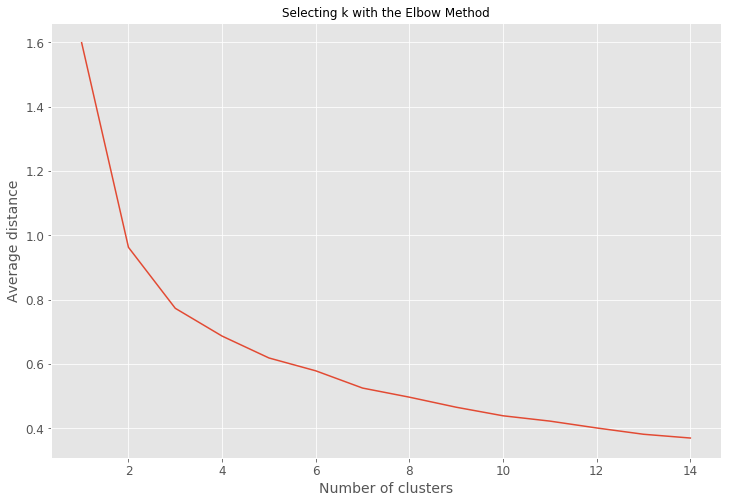

In [95]:
# loop through each cluster and fit the model to the train set
# generate the predicted cluster assingment and append the mean 
# distance my taking the sum divided by the shape
for k in clusters:
    model=KMeans(n_clusters=k)
    model.fit(iris_sp)
    clusassign=model.predict(iris_sp)
    meandist.append(sum(np.min(cdist(iris_sp, model.cluster_centers_, 'euclidean'), axis=1))
    / iris_sp.shape[0])

"""
Plot average distance from observations from the cluster centroid
to use the Elbow Method to identify number of clusters to choose
"""
plt.plot(clusters, meandist)
plt.xlabel('Number of clusters')
plt.ylabel('Average distance')
plt.title('Selecting k with the Elbow Method') 
# pick the fewest number of clusters that reduces the average distance
# If you observe after 3 we can see graph is almost linear